# **Brain Tumor Image Classification Using CNN + VGG 16**

## **Context**

In this notebook, we will build an image classifier that can distinguish Pituitary Tumor from "No Tumor" MRI Scan images. 

The dataset used in this notebook is available for download from [Kaggle](https://www.kaggle.com/datasets/sartajbhuvaji/brain-tumor-classification-mri). 

Although this dataset actually has a total of 3,264 images belonging to 4 classes - Glioma Tumor, Meningioma Tumor, Pituitary Tumor and No Tumor, for this project we have only taken two classes, and **we are building a binary classification model to classify between the Pituitary Tumor category vs No Tumor.**

For this project, we will only use 1000 of these images (830 training images and 170 Testing images). For the training dataset, we will take 395 MRI scans of No Tumor and 435 MRI scans of Pituitary Tumor. In our problem, we will also be using Data Augmentation to prevent overfitting, and to make our model model more generalised and robust.

We will use this to build an image classification model for this problem statement, and then show how we can improve our performance by simply "importing" a popular pre-trained model architecture and leveraging the idea of **Transfer Learning**.

## **Objectives**
The objectives of this project are to: 
1. Load and understand the dataset
2. Automatically label the images
3. Perform Data Augmentation
4. Build a classification model for this problem using CNNs
5. Improve the model's performance through Transfer Learning



## **Importing Libraries**

In [5]:
pip install tensorflow

  Obtaining dependency information for tensorflow from https://files.pythonhosted.org/packages/93/21/9b035a4f823d6aee2917c75415be9a95861ff3d73a0a65e48edbf210cec1/tensorflow-2.15.0-cp311-cp311-win_amd64.whl.metadata
  Obtaining dependency information for tensorflow-intel==2.15.0 from https://files.pythonhosted.org/packages/4c/48/1a5a15517f18eaa4ff8d598b1c000300b20c1bb0e624539d702117a0c369/tensorflow_intel-2.15.0-cp311-cp311-win_amd64.whl.metadata
  Obtaining dependency information for flatbuffers>=23.5.26 from https://files.pythonhosted.org/packages/6f/12/d5c79ee252793ffe845d58a913197bfa02ae9a0b5c9bc3dc4b58d477b9e7/flatbuffers-23.5.26-py2.py3-none-any.whl.metadata
     ---------------------------------------- 0.0/57.5 kB ? eta -:--:--
     ---------------------------------------- 57.5/57.5 kB 1.5 MB/s eta 0:00:00
  Obtaining dependency information for libclang>=13.0.0 from https://files.pythonhosted.org/packages/02/8c/dc970bc00867fe290e8c8a7befa1635af716a9ebdfe3fb9dce0ca4b522ce/libclang

In [1]:
pip install keras

  Obtaining dependency information for keras from https://files.pythonhosted.org/packages/a3/31/982a0c8da5e06b8e915e09e7cae7f7815eecfef7e9e16fd733b105aa09ab/keras-3.0.4-py3-none-any.whl.metadata
  Obtaining dependency information for absl-py from https://files.pythonhosted.org/packages/a2/ad/e0d3c824784ff121c03cc031f944bc7e139a8f1870ffd2845cc2dd76f6c4/absl_py-2.1.0-py3-none-any.whl.metadata
  Obtaining dependency information for rich from https://files.pythonhosted.org/packages/be/be/1520178fa01eabe014b16e72a952b9f900631142ccd03dc36cf93e30c1ce/rich-13.7.0-py3-none-any.whl.metadata
     ---------------------------------------- 0.0/101.3 kB ? eta -:--:--
     -------------------------------------- 101.3/101.3 kB 1.9 MB/s eta 0:00:00
   ---------------------------------------- 0.0/1.0 MB ? eta -:--:--
   --------------------- ------------------ 0.5/1.0 MB 17.2 MB/s eta 0:00:01
   ---------------------------------------  1.0/1.0 MB 12.7 MB/s eta 0:00:01
   ---------------------------------

In [6]:
# Library for creating data paths
import os

# Library for randomly selecting data points
import random

# Library for performing numerical computations
import numpy as np

# Library for creating and showing plots
import matplotlib.pyplot as plt

# Library for reading and showing images
import matplotlib.image as mpimg

# Importing all the required sub-modules from Keras
from keras.models import Sequential, Model
from keras.applications.vgg16 import VGG16
from keras.preprocessing.image import ImageDataGenerator
from keras.preprocessing.image import img_to_array, load_img
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, BatchNormalization, Dropout

# Importing the updated modules
import tensorflow as tf
from tensorflow.compat.v1.losses import sparse_softmax_cross_entropy
from tensorflow.compat.v1.train import AdamOptimizer

# Suppress TensorFlow deprecation warnings
tf.compat.v1.logging.set_verbosity(tf.compat.v1.logging.ERROR)

# Your code for building and compiling the model
model = Sequential()
# Add layers to the model as needed

# Compile the model using the updated loss function and optimizer
model.compile(optimizer=AdamOptimizer(), loss=sparse_softmax_cross_entropy, metrics=['accuracy'])

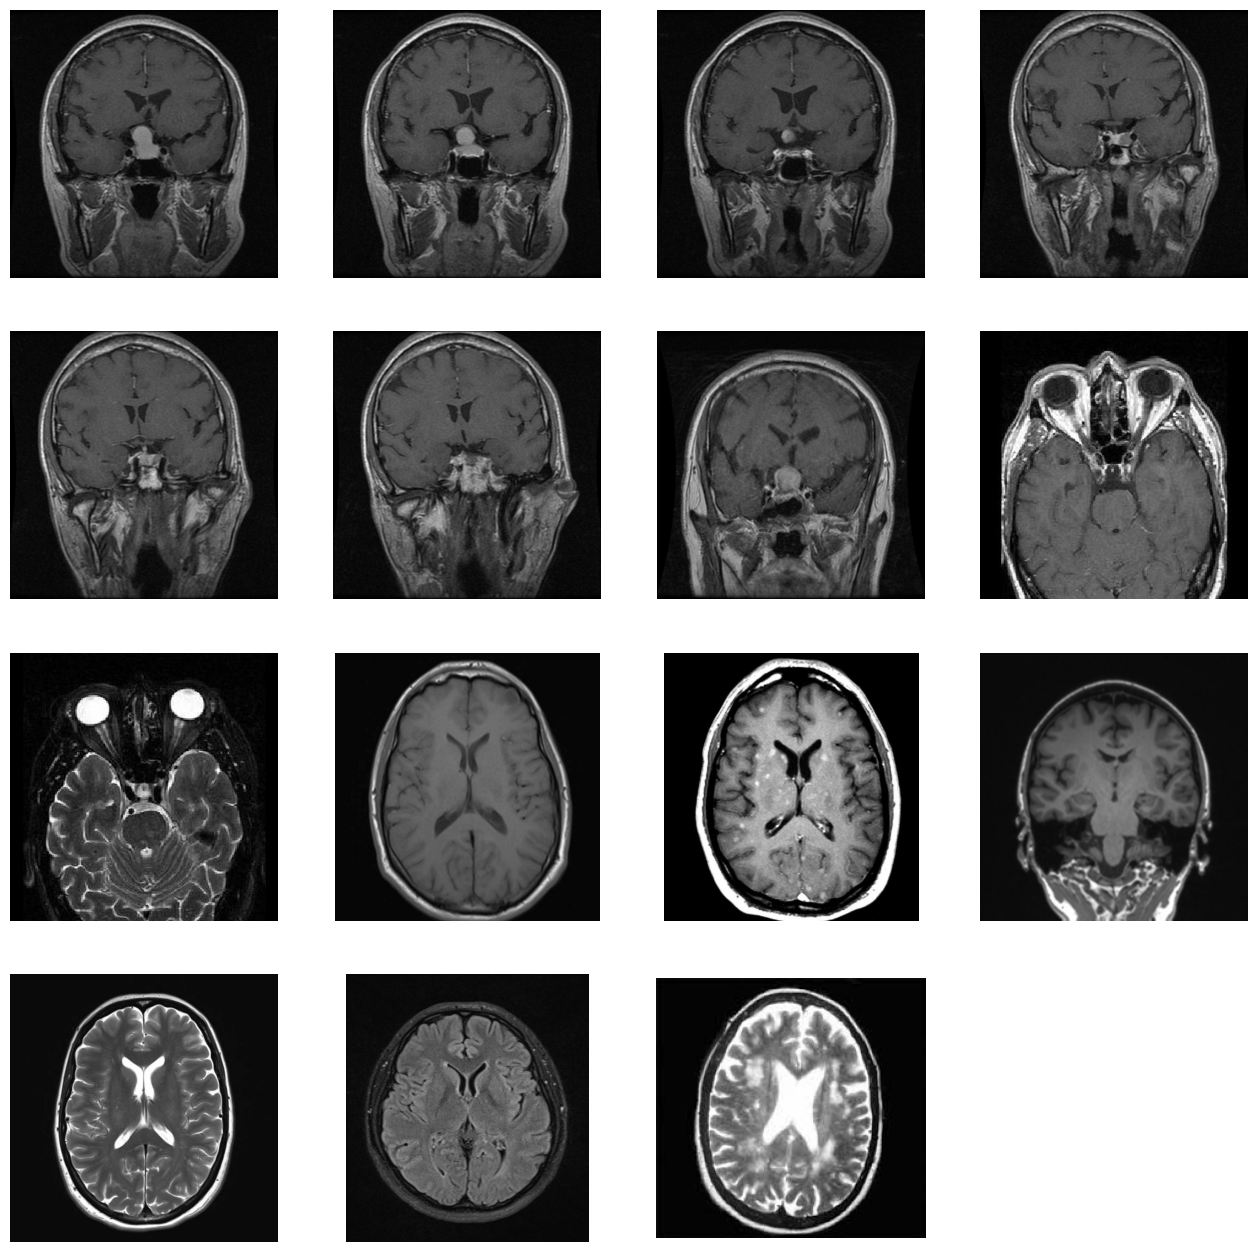

In [4]:
# Library for creating data paths
import os

# Library for creating and showing plots
import matplotlib.pyplot as plt

# Library for reading and showing images
import matplotlib.image as mpimg

# Your previous code
train_pituitary_file_names = os.listdir(train_pituitary_dir)
train_no_file_names = os.listdir(train_no_dir)

fig = plt.figure(figsize=(16, 8))
fig.set_size_inches(16, 16)

# Filter out non-image files (e.g., '.DS_Store')
pituitary_img_paths = [os.path.join(train_pituitary_dir, file_name) for file_name in train_pituitary_file_names[:8] if file_name.lower().endswith(('.png', '.jpg', '.jpeg', '.gif', '.bmp'))]
no_img_paths = [os.path.join(train_no_dir, file_name) for file_name in train_no_file_names[:8] if file_name.lower().endswith(('.png', '.jpg', '.jpeg', '.gif', '.bmp'))]

for i, img_path in enumerate(pituitary_img_paths + no_img_paths):
    ax = plt.subplot(4, 4, i + 1)
    ax.axis('Off')

    img = mpimg.imread(img_path)
    plt.imshow(img)

plt.show()


In [1]:
import os

# Parent directory where images are stored
parent_dir = r'C:\Users\KimTS\Downloads\brain_tumor'

# Path to the training and testing datasets within the parent directory
train_dir = os.path.join(parent_dir, 'Training')
validation_dir = os.path.join(parent_dir, 'Testing')

# Directory with our training pictures
train_pituitary_dir = os.path.join(train_dir, 'pituitary_tumor')
train_no_dir = os.path.join(train_dir, 'no_tumor')

# Directory with our testing pictures
validation_pituitary_dir = os.path.join(validation_dir, 'pituitary_tumor')
validation_no_dir = os.path.join(validation_dir, 'no_tumor')

We have stored the images in a structured folder, and below we create the data paths to load images from those folders. This is required so that we can extract images in an auto-labelled fashion using Keras **flow_from_directory**.

## **Visualizing a few images**

Before we move ahead and perform data augmentation, let's randomly check out some of the images and see what they look like:

As we can see, the images are quite different in size from each other.

This represents a problem, as most CNN architectures, including the pre-built model architectures that we will use for Transfer Learning, **expect all the images to have the same size.** 

So we need to crop these images from the center to make sure they all have the same size. We can do this automatically while performing Data Augmentation, as shown below.

## **Data Augmentation**

In most real-life case studies, it is generally difficult to collect lots of images and then train CNNs. In that case, one idea we can take advantage of is Data Augmentation. CNNs have the property of **translational invariance**, i.e., they can recognize an object as an object, even when its appearance varies translationally in some way. Taking this property into consideration, we can augment the images using the following techniques: 

**1. Horizontal Flip** (should be set to True/False) <br>
**2. Vertical Flip** (should be set to True/False) <br>
**3. Height Shift** (should be between 0 and 1) <br>
**4. Width Shift** (should be between 0 and 1) <br>
**5. Rotation** (should be between 0 and 180) <br>
**6. Shear** (should be between 0 and 1) <br>
**7. Zoom** (should be between 0 and 1) etc. <br>

Remember ***not to use data augmentation in the validation/test data set***.

Also, as mentioned above, we need to have images of the same size. So below,we resize the images by using the parameter **target_size**. Here we are resizing it to **224 x 224**, as we will be using the **VGG16** model for Transfer Learning, which takes image inputs as **224 x 224**. 

As this is a binary classification problem, we will need class labels. This is directly handled by the **flow_from_directory** function. It will take the images from the folder inside our specified directory, and the images from one folder will belong to same class.

As the train directory has 2 folders pituitary_tumor and no_tumor, it will read the directory and each folder will be considered a separate class. We specify **class_model = 'binary'** as this is a binary classification problem.

As the folders inside the directory will be read in an alphabetical order, the no_tumor folder will be given a label 0, and pituitary_tumor will be label 1. 

In [13]:
# Importing all the required sub-modules from Keras
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, BatchNormalization, Dropout
from keras.optimizers import Adam

# Disable TensorFlow deprecation warnings
import tensorflow as tf
tf.compat.v1.logging.set_verbosity(tf.compat.v1.logging.ERROR)

# Parent directory where images are stored
parent_dir = 'C:\\Users\\KimTS\\Downloads\\brain_tumor'

# Path to the training and testing datasets within the parent directory
train_dir = os.path.join(parent_dir, 'Training')
validation_dir = os.path.join(parent_dir, 'Testing')

# All images to be rescaled by 1/255.
train_datagen = ImageDataGenerator(rescale=1. / 255.0,
                                   horizontal_flip=True,
                                   vertical_flip=False,
                                   height_shift_range=0.1,
                                   width_shift_range=0.1,
                                   rotation_range=20,
                                   shear_range=0.1,
                                   zoom_range=0.1)

test_datagen = ImageDataGenerator(rescale=1.0/255.)

# Flowing training images in batches of 20 using train_datagen generator
train_generator = train_datagen.flow_from_directory(train_dir,
                                                    batch_size=20,
                                                    class_mode='binary',  # Use 'binary' for two classes
                                                    target_size=(224, 224))

# Flowing testing images in batches of 20 using test_datagen generator
validation_generator = test_datagen.flow_from_directory(validation_dir,
                                                        batch_size=20,
                                                        class_mode='binary',  # Use 'binary' for two classes
                                                        target_size=(224, 224))

# Building a simple CNN model
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(224, 224, 3)))
model.add(MaxPooling2D(2, 2))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(2, 2))
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D(2, 2))
model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(1, activation='sigmoid'))  # Use 1 unit and 'sigmoid' activation for binary classification

# Compile the model using 'binary_crossentropy' loss function
model.compile(optimizer=Adam(), loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(train_generator, epochs=10, validation_data=validation_generator)

# Save the trained model
model.save('C:\\Users\\KimTS\\Downloads\\brain_tumor_model.h5')

Found 830 images belonging to 2 classes.
Found 170 images belonging to 2 classes.
Epoch 1/10
42/42 [==============================] - 50s 1s/step - loss: 0.7852 - accuracy: 0.5711 - val_loss: 0.6760 - val_accuracy: 0.6000
Epoch 2/10
42/42 [==============================] - 41s 939ms/step - loss: 0.4971 - accuracy: 0.7410 - val_loss: 1.5980 - val_accuracy: 0.6176
Epoch 3/10
42/42 [==============================] - 44s 1s/step - loss: 0.3121 - accuracy: 0.8795 - val_loss: 1.5301 - val_accuracy: 0.6647
Epoch 4/10
42/42 [==============================] - 39s 915ms/step - loss: 0.2478 - accuracy: 0.9012 - val_loss: 1.0246 - val_accuracy: 0.6765
Epoch 5/10
42/42 [==============================] - 43s 1s/step - loss: 0.2140 - accuracy: 0.9229 - val_loss: 1.6390 - val_accuracy: 0.7294
Epoch 6/10
42/42 [==============================] - 39s 922ms/step - loss: 0.2091 - accuracy: 0.9253 - val_loss: 2.4671 - val_accuracy: 0.7000
Epoch 7/10
42/42 [==============================] - 44s 1s/step - los

Let's look at some examples of our augmented training data. 

This is helpful for understanding the extent to which data is being manipulated prior to training, and can be compared with how the raw data looks prior to data augmentation.

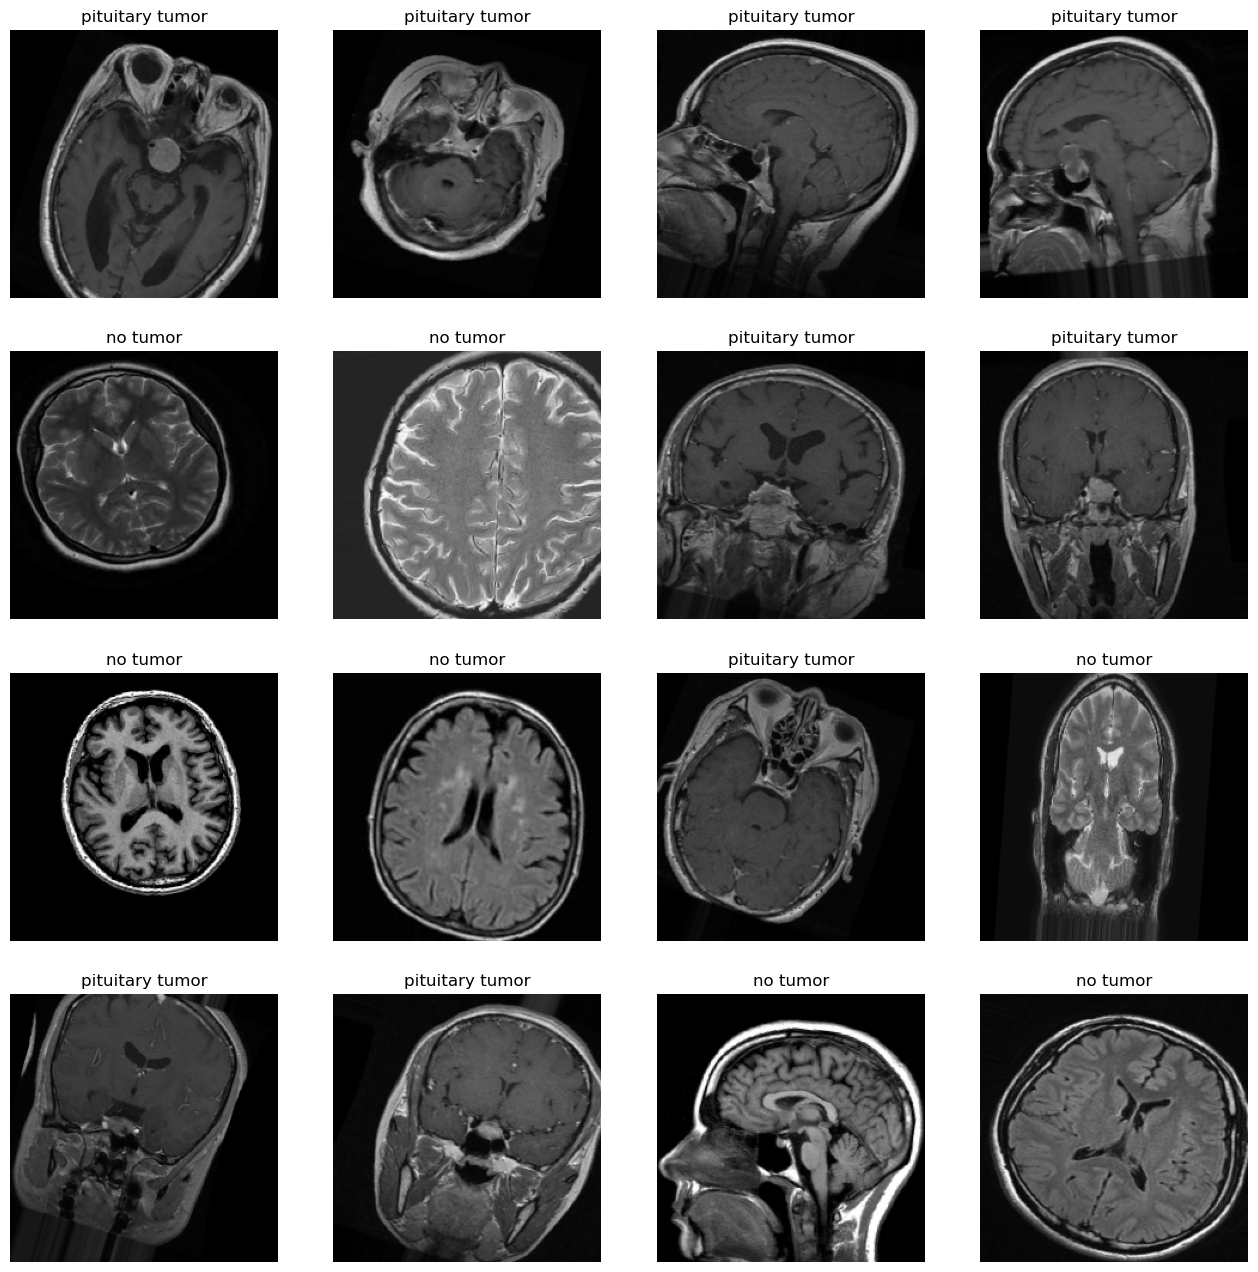

In [8]:
images, labels = next(train_generator)
fig, axes = plt.subplots(4, 4, figsize = (16, 8))
fig.set_size_inches(16, 16)
for (image, label, ax) in zip(images, labels, axes.flatten()):
    ax.imshow(image)
    if label == 1: 
        ax.set_title('pituitary tumor')
    else:
        ax.set_title('no tumor')
    ax.axis('off')

## **CNN Model Building**

Once the data is augmented and cropped to have the same size, we are now ready to build a first baseline CNN model to classify no_tumor vs pituitary_tumor.

When building our custom model, we have used Batch Normalization and Dropout layers as regularization techniques to prevent overfitting.

In [10]:
cnn_model = Sequential()
cnn_model.add(Conv2D(64, (3,3), activation='relu', input_shape=(224, 224, 3), padding = 'same'))
cnn_model.add(MaxPooling2D(2,2))
cnn_model.add(BatchNormalization())
cnn_model.add(Conv2D(32, (3,3), activation='relu', padding = 'same'))
cnn_model.add(MaxPooling2D(2,2))
cnn_model.add(BatchNormalization())
cnn_model.add(Conv2D(32, (3,3), activation='relu', padding = 'same'))
cnn_model.add(MaxPooling2D(2,2))
cnn_model.add(Conv2D(16, (3,3), activation='relu', padding = 'same'))
cnn_model.add(Flatten())
cnn_model.add(Dense(64, activation='relu'))
cnn_model.add(Dropout(0.25))
cnn_model.add(Dense(32, activation='relu'))
cnn_model.add(Dropout(0.25))
cnn_model.add(Dense(32, activation='relu'))
cnn_model.add(Dense(1, activation='sigmoid'))

In [11]:
cnn_model.compile(loss="binary_crossentropy", optimizer="adam", metrics = ['accuracy'])
cnn_model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_9 (Conv2D)           (None, 224, 224, 64)      1792      
                                                                 
 max_pooling2d_9 (MaxPoolin  (None, 112, 112, 64)      0         
 g2D)                                                            
                                                                 
 batch_normalization (Batch  (None, 112, 112, 64)      256       
 Normalization)                                                  
                                                                 
 conv2d_10 (Conv2D)          (None, 112, 112, 32)      18464     
                                                                 
 max_pooling2d_10 (MaxPooli  (None, 56, 56, 32)        0         
 ng2D)                                                           
                                                      

In [12]:
# Pulling a single large batch of random testing data for testing after each epoch
testX, testY = validation_generator.next()

In [13]:
model_history = cnn_model.fit(train_generator, 
                              validation_data=(testX, testY),
                              epochs=10)

Epoch 1/10
42/42 [==============================] - 67s 1s/step - loss: 0.4990 - accuracy: 0.7506 - val_loss: 0.4996 - val_accuracy: 0.7000
Epoch 2/10
42/42 [==============================] - 39s 924ms/step - loss: 0.4095 - accuracy: 0.8386 - val_loss: 0.7429 - val_accuracy: 0.5500
Epoch 3/10
42/42 [==============================] - 34s 807ms/step - loss: 0.3690 - accuracy: 0.8482 - val_loss: 0.9026 - val_accuracy: 0.5500
Epoch 4/10
42/42 [==============================] - 39s 919ms/step - loss: 0.3140 - accuracy: 0.8964 - val_loss: 1.6259 - val_accuracy: 0.4000
Epoch 5/10
42/42 [==============================] - 32s 748ms/step - loss: 0.2945 - accuracy: 0.8952 - val_loss: 2.0905 - val_accuracy: 0.4000
Epoch 6/10
42/42 [==============================] - 39s 915ms/step - loss: 0.2747 - accuracy: 0.8988 - val_loss: 1.7770 - val_accuracy: 0.5500
Epoch 7/10
42/42 [==============================] - 34s 804ms/step - loss: 0.2159 - accuracy: 0.9241 - val_loss: 1.7614 - val_accuracy: 0.5000
Ep

In [14]:
# Evaluating on the Test dataset
cnn_model.evaluate(validation_generator)

9/9 [==============================] - 2s 178ms/step - loss: 0.6942 - accuracy: 0.7294


[0.6942266821861267, 0.729411780834198]

### **Findings**

- Our model had 840,369 trainable parameters.
- After running 10 epochs, we were able to achieve a training accuracy of ~95% and a testing accuracy of ~72%.
- Even after using Data Augmentation, Batch Normalization and the Dropout Layers, the model seems to have highly overfit on the training dataset and is performing somewhat poorly.

## **Model Building using Transfer Learning: VGG 16**

- Now, let's try again, but this time, using the idea of **Transfer Learning**. We will be loading a pre-built architecture - **VGG16**, which was trained on the ImageNet dataset and finished runner-up in the ImageNet competition in 2014. Below is a schematic of the VGG16 model.

- For training VGG16, we will directly use the convolutional and pooling layers and freeze their weights i.e. no training will be done on them. We will remove the already-present fully-connected layers and add our own fully-connected layers for this binary classification task.


![vgg16](https://upload.wikimedia.org/wikipedia/commons/2/24/VGG16.png)

In [16]:
# Importing the required module
from keras.applications.vgg16 import VGG16

# Summary of the whole model
model = VGG16(weights='imagenet')
model.summary()

553467096/553467096 [==============================] - 37s 0us/step
Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                           

In [18]:
# Importing the required module
from keras.models import Model

# Getting only the conv layers for transfer learning.
transfer_layer = model.get_layer('block5_pool')
vgg_model = Model(inputs=model.input, outputs=transfer_layer.output)

In [ ]:
vgg_model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

- To remove the fully-connected layers of the imported pre-trained model, while calling it from Keras we can also specify an additonal keyword argument that is **include_top**. 

- **If we specify include_top = False, then the model will be imported without the fully-connected layers.** Here we won't have to do the above steps of getting the last convolutional layer and creating a separate model.

- If we are specifying include_top = False, we will also have to specify our input image shape.

- Keras has this keyword argument as generally while importing a pre-trained CNN model, we don't require the fully-connected layers and we train our own fully-connected layers for our task.

In [19]:
vgg_model = VGG16(weights='imagenet', include_top = False, input_shape = (224,224,3))
vgg_model.summary()

58889256/58889256 [==============================] - 4s 0us/step
Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                              

In [20]:
# Making all the layers of the VGG model non-trainable. i.e. freezing them
for layer in vgg_model.layers:
    layer.trainable = False

In [21]:
for layer in vgg_model.layers:
    print(layer.name, layer.trainable)

input_2 False
block1_conv1 False
block1_conv2 False
block1_pool False
block2_conv1 False
block2_conv2 False
block2_pool False
block3_conv1 False
block3_conv2 False
block3_conv3 False
block3_pool False
block4_conv1 False
block4_conv2 False
block4_conv3 False
block4_pool False
block5_conv1 False
block5_conv2 False
block5_conv3 False
block5_pool False


In [22]:
new_model = Sequential()

# Adding the convolutional part of the VGG16 model from above
new_model.add(vgg_model)

# Flattening the output of the VGG16 model because it is from a convolutional layer
new_model.add(Flatten())

# Adding a dense output layer
new_model.add(Dense(32, activation='relu'))
new_model.add(Dense(32, activation='relu'))
new_model.add(Dense(1, activation='sigmoid'))

In [23]:
new_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
new_model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 7, 7, 512)         14714688  
                                                                 
 flatten_4 (Flatten)         (None, 25088)             0         
                                                                 
 dense_10 (Dense)            (None, 32)                802848    
                                                                 
 dense_11 (Dense)            (None, 32)                1056      
                                                                 
 dense_12 (Dense)            (None, 1)                 33        
                                                                 
Total params: 15518625 (59.20 MB)
Trainable params: 803937 (3.07 MB)
Non-trainable params: 14714688 (56.13 MB)
_________________________________________________________________


In [24]:
## Fitting the VGG model
new_model_history = new_model.fit(train_generator, 
                                  validation_data=(testX, testY),
                                  epochs=5)

Epoch 1/5
42/42 [==============================] - 149s 3s/step - loss: 0.3669 - accuracy: 0.8361 - val_loss: 0.3653 - val_accuracy: 0.8500
Epoch 2/5
42/42 [==============================] - 154s 4s/step - loss: 0.1100 - accuracy: 0.9566 - val_loss: 0.7512 - val_accuracy: 0.8000
Epoch 3/5
42/42 [==============================] - 159s 4s/step - loss: 0.0963 - accuracy: 0.9627 - val_loss: 0.3986 - val_accuracy: 0.9000
Epoch 4/5
42/42 [==============================] - 208s 5s/step - loss: 0.0529 - accuracy: 0.9771 - val_loss: 0.3419 - val_accuracy: 0.9000
Epoch 5/5
42/42 [==============================] - 195s 5s/step - loss: 0.0486 - accuracy: 0.9795 - val_loss: 0.5723 - val_accuracy: 0.8500


In [25]:
# Evaluating on the Test set
new_model.evaluate(validation_generator)

9/9 [==============================] - 42s 5s/step - loss: 0.5148 - accuracy: 0.8294


[0.5147502422332764, 0.8294117450714111]

In [26]:
# Function to plot loss, val_loss, 
def plot_history(history):
    N = len(history.history["accuracy"])
    plt.figure()
    plt.plot(np.arange(0, N), history.history["accuracy"], label="train_accuracy")
    plt.plot(np.arange(0, N), history.history["val_accuracy"], label="val_accuracy")
    plt.title("Training accuracy Dataset")
    plt.xlabel("Epoch #")
    plt.ylabel("accuracy")
    plt.legend(loc="upper right")

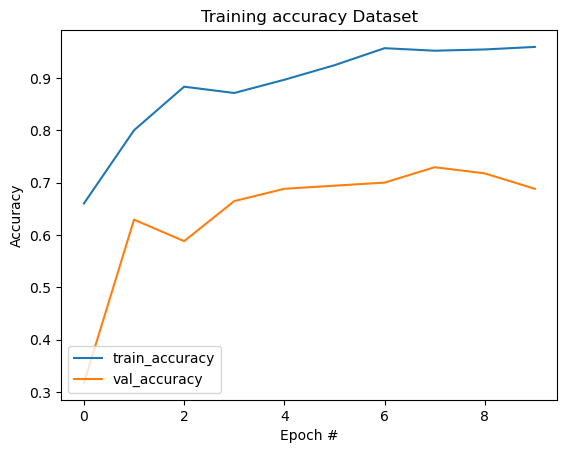

In [28]:
# Importing all the required sub-modules
import os
import random
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from keras.models import Sequential, Model
from keras.applications.vgg16 import VGG16
from keras.preprocessing.image import ImageDataGenerator
from keras.preprocessing.image import img_to_array, load_img
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, BatchNormalization, Dropout
from keras.optimizers import Adam

# ... (rest of your code)

# Function to plot training and validation accuracy
def plot_history(history):
    N = len(history.history["accuracy"])
    plt.figure()
    plt.plot(np.arange(0, N), history.history["accuracy"], label="train_accuracy")
    plt.plot(np.arange(0, N), history.history["val_accuracy"], label="val_accuracy")
    plt.title("Training accuracy Dataset")
    plt.xlabel("Epoch #")
    plt.ylabel("Accuracy")
    plt.legend(loc="lower left")

# Plotting the loss vs epoch curve for the basic CNN model without Transfer Learning
plot_history(history)

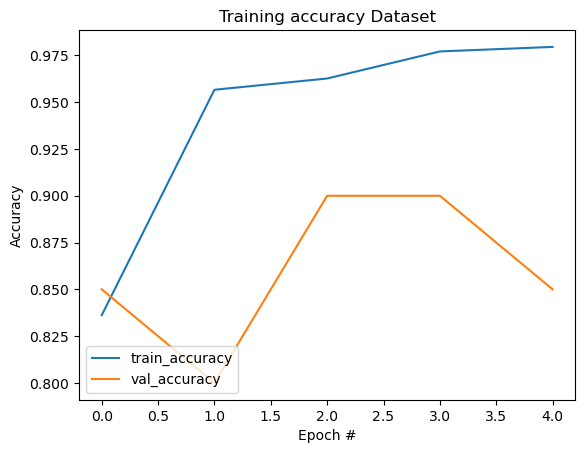

In [29]:
# Plotting the loss vs epoch curve for the Transfer Learning model
plot_history(new_model_history)

### Findings

- Our model has 803,937 Trainable parameters.
- After running 5 epochs we were able to achieve a training accuracy of ~98% and a validation accuracy of ~ 85%.

## **Conclusions**

- The difference in both models is evident. Both models had nearly the same number of trainable parameters. However even after training the custom CNN model for 10 epochs, it could not attain accuracies as high as we achieved with Transfer Learning.

- The Transfer Learning model has converged faster than the custom CNN model in only 5 epochs.

- That's a good level of improvement just by directly using a pre-trained architecture such as VGG16.

- This model can, in fact, further be tuned to achieve the accuracies required for practical applicability in the medical domain.

In [7]:
import os
print("Current Working Directory:", os.getcwd())

Current Working Directory: C:\Users\KimTS


In [9]:
import os

# List files in the current working directory
files_in_current_directory = os.listdir(os.getcwd())

# Filter files to only include those with the .h5 extension
model_files = [file for file in files_in_current_directory if file.endswith('.h5')]

# Print the list of model files
print("Model Files in Current Directory:", model_files)

Model Files in Current Directory: []


In [10]:
# Print the list of files in the current directory
print("Model Files in Current Directory:", os.listdir())

Model Files in Current Directory: ['.cache', '.cisco', '.ipynb_checkpoints', '.ipython', '.jupyter', '.keras', '.matplotlib', '.ms-ad', 'Amazon_Product_Reviews.ipynb', 'AppData', 'Application Data', 'Assignment_Tae Hwan Kim_L6_v2.ipynb', 'Assignment_Tae Hwan Kim_L7.ipynb', 'Assignment_Tae Hwan Kim_L8.ipynb', 'Assignment_Tae Hwan Kim_L9.ipynb', 'Brain Tumor Image Classifier.ipynb', 'Challenger_Final_3_MIT_Case_Study.ipynb', 'CNN_Sequential_Model.ipynb', 'Contacts', 'Cookies', 'Documents', 'Downloads', 'Favorites', 'FINAL PROJECT_Group XX.ipynb', 'HR_Employee_Attrition_Case_Study.ipynb', 'Individual Assignment 2 - Fake News (Tae Hwan Kim).ipynb', 'L8.ipynb', 'Links', 'Local Settings', 'LSTM - send to Denver.ipynb', 'Million_Songs.ipynb', 'Music', 'My Documents', 'NetHood', 'Network_Stock_Portfolio_Optimization (1).ipynb', 'neural groupwork (1).ipynb', 'NTUSER.dat', 'NTUSER.dat.bak.{0F9ECD29-0C5A-461F-81AD-B878DF86FA21}', 'ntuser.dat.LOG1', 'ntuser.dat.LOG2', 'NTUSER.dat{d2edbcb3-a9e5-11e

In [14]:
import os

# Parent directory where images are stored
parent_dir = r'C:\Users\KimTS\Downloads\brain_tumor'

# Path to the training and testing datasets within the parent directory
train_dir = os.path.join(parent_dir, 'Training')
validation_dir = os.path.join(parent_dir, 'Testing')

# Directory with our training pictures
train_pituitary_dir = os.path.join(train_dir, 'pituitary_tumor')
train_no_dir = os.path.join(train_dir, 'no_tumor')

# Directory with our testing pictures
validation_pituitary_dir = os.path.join(validation_dir, 'pituitary_tumor')
validation_no_dir = os.path.join(validation_dir, 'no_tumor')

# Check if the directories exist and print the number of images in each directory
def check_directory(directory):
    if os.path.exists(directory):
        image_files = [f for f in os.listdir(directory) if f.lower().endswith(('.png', '.jpg', '.jpeg', '.gif', '.bmp'))]
        print(f"Directory: {directory} contains {len(image_files)} images.")
    else:
        print(f"Directory: {directory} does not exist.")

# Check the directories
check_directory(train_pituitary_dir)
check_directory(train_no_dir)
check_directory(validation_pituitary_dir)
check_directory(validation_no_dir)

Directory: C:\Users\KimTS\Downloads\brain_tumor\Training\pituitary_tumor contains 435 images.
Directory: C:\Users\KimTS\Downloads\brain_tumor\Training\no_tumor contains 395 images.
Directory: C:\Users\KimTS\Downloads\brain_tumor\Testing\pituitary_tumor contains 70 images.
Directory: C:\Users\KimTS\Downloads\brain_tumor\Testing\no_tumor contains 100 images.


In [27]:
pip install shap tensorflow --upgrade


Note: you may need to restart the kernel to use updated packages.


In [4]:
pip install lime

     ---------------------------------------- 0.0/275.7 kB ? eta -:--:--
     - -------------------------------------- 10.2/275.7 kB ? eta -:--:--
     - -------------------------------------- 10.2/275.7 kB ? eta -:--:--
     - -------------------------------------- 10.2/275.7 kB ? eta -:--:--
     ---- -------------------------------- 30.7/275.7 kB 130.4 kB/s eta 0:00:02
     ---- -------------------------------- 30.7/275.7 kB 130.4 kB/s eta 0:00:02
     ----- ------------------------------- 41.0/275.7 kB 130.7 kB/s eta 0:00:02
     --------- --------------------------- 71.7/275.7 kB 206.9 kB/s eta 0:00:01
     ----------------------------- ------ 225.3/275.7 kB 597.3 kB/s eta 0:00:01
     ------------------------------------ 275.7/275.7 kB 679.0 kB/s eta 0:00:00
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Created wheel for lime: filename=lime-0.2.0.1-py3-none-any.whl size=283846 sha256=11a7cee44454e814221b1ddf9748bdafce898ea

  0%|          | 0/1000 [00:00<?, ?it/s]

1/1 [==============================] - 2s 2s/step


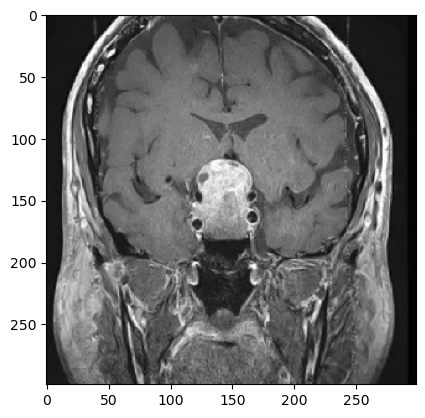

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


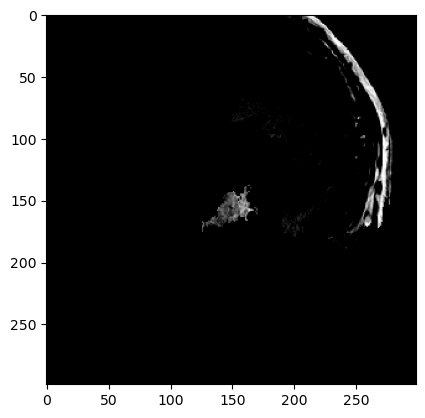

In [10]:
import lime
from lime import lime_image
from tensorflow.keras.applications.inception_v3 import InceptionV3, preprocess_input, decode_predictions
from tensorflow.keras.preprocessing import image
import numpy as np
import matplotlib.pyplot as plt

# Load your trained model (replace this with your actual model)
model = InceptionV3(weights='imagenet')

# Load an example image for explanation
image_path = r'C:\Users\KimTS\Downloads\brain_tumor\Testing\pituitary_tumor\image(98).jpg'
img = image.load_img(image_path, target_size=(299, 299))
img_array = image.img_to_array(img)
img_array = preprocess_input(np.expand_dims(img_array, axis=0))

# Define the LIME explainer
explainer = lime_image.LimeImageExplainer()

# Generate explanations
explanation = explainer.explain_instance(img_array[0], model.predict, top_labels=1, num_samples=1000)

# Display the original image
plt.imshow(img)
plt.show()

# Display the LIME explanation with image boundaries
lime_img, mask = explanation.get_image_and_mask(explanation.top_labels[0], positive_only=True, num_features=5, hide_rest=True)
plt.imshow(lime_img)
plt.show()

# Recommendations

Interpretation of Results:

Analyze the LIME explanations to understand how the model makes predictions for specific instances.
Look at the highlighted regions in the LIME visualization to identify which parts of the image contribute most to the model's decision.

Iterative Refinement:

If the explanations reveal unexpected behavior or if certain predictions are hard to interpret, consider refining your model or dataset.
This might involve adjusting hyperparameters, collecting more diverse data, or exploring advanced techniques to improve model interpretability.

Documentation:

Document your findings and insights from the LIME explanations. This documentation can be valuable for communication within your team or when presenting results to stakeholders.

Model Improvement:

Use the insights gained from the LIME explanations to iteratively improve your model. This might involve fine-tuning, retraining, or modifying the architecture to better align with the desired behavior.
Additional Interpretability Techniques:

Explore other interpretability techniques, such as SHAP (SHapley Additive exPlanations), Integrated Gradients, or Grad-CAM, to gain a more comprehensive understanding of your model's behavior.

Presentation:

If your analysis reveals interesting patterns or insights, consider preparing a presentation or report to share your findings with your team or stakeholders.